Question 2

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/K-Means Data.csv')
df = df.drop(columns=['Names','Patient ID'])
df.head(2)

,Fever (°F),Headache,Previous Occurrence,Category
0,101.48,1.0,Yes,Healthy
1,97.18,1.0,No,Normal


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Previous Occurrence'] = le.fit_transform(df['Previous Occurrence'])
df.head(2)

,Fever (°F),Headache,Previous Occurrence,Category
0,101.48,1.0,1,0
1,97.18,1.0,0,1


In [ ]:
from sklearn import cluster

In [ ]:
from sklearn import cluster
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# Run KMeans clustering
error = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_imputed)
    error.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:


error

[834.5939850256418,
 375.6707436038092,
 270.0247798338446,
 232.26979585847627,
 197.1101405043543,
 174.60207543519596,
 154.72495037295187,
 134.25421403708168,
 123.45979580620116,
 117.24016891880497]

In [ ]:
km_model = cluster.KMeans(n_clusters=3, init = 'k-means++',random_state=0)

In [ ]:
km_model.fit(df_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [ ]:


pred = km_model.predict(df_imputed)
pred

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2,
       0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
km_model.predict([[98,0,0,0]])

array([1], dtype=int32)

Question 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
df = pd.read_csv('/content/Naive Bayes.csv')
df.head(2)

,Patient ID,Gender,Age,Weight,Height,BMI,Existing Diet,Exercise,Strictness
0,E001,Female,71,77.234300,1.787617,42.31,Keto,Rarely,Yes
1,E002,Female,50,81.614079,1.896903,23.24,Vegan,Rarely,No


In [ ]:

le = LabelEncoder()
categorical_cols = ['Gender', 'Existing Diet', 'Exercise', 'Strictness']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop(['Patient ID', 'Strictness'], axis=1)
y = df['Strictness']

In [ ]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Weight', 'Height', 'BMI']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:


y_pred = nb_model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Strictness,,
0,1,3
1,4,2


In [ ]:


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.40      0.33      0.36         6

    accuracy                           0.30        10
   macro avg       0.30      0.29      0.29        10
weighted avg       0.32      0.30      0.31        10



Question 3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz



In [ ]:
df = pd.read_csv('/content/Road.csv')

In [ ]:
x = df[['Length', 'Number_of_Bends', 'Traffic_Volume']]
y = df['Accident_Risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:



print("Confusion Matrix:")
pd.crosstab(y_test,y_pred)

Confusion Matrix:


col_0,High,Low,Medium
Accident_Risk,,,
High,3,1,2
Low,0,2,1
Medium,0,1,0


In [ ]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         6
         Low       0.50      0.67      0.57         3
      Medium       0.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.50      0.39      0.41        10
weighted avg       0.75      0.50      0.57        10



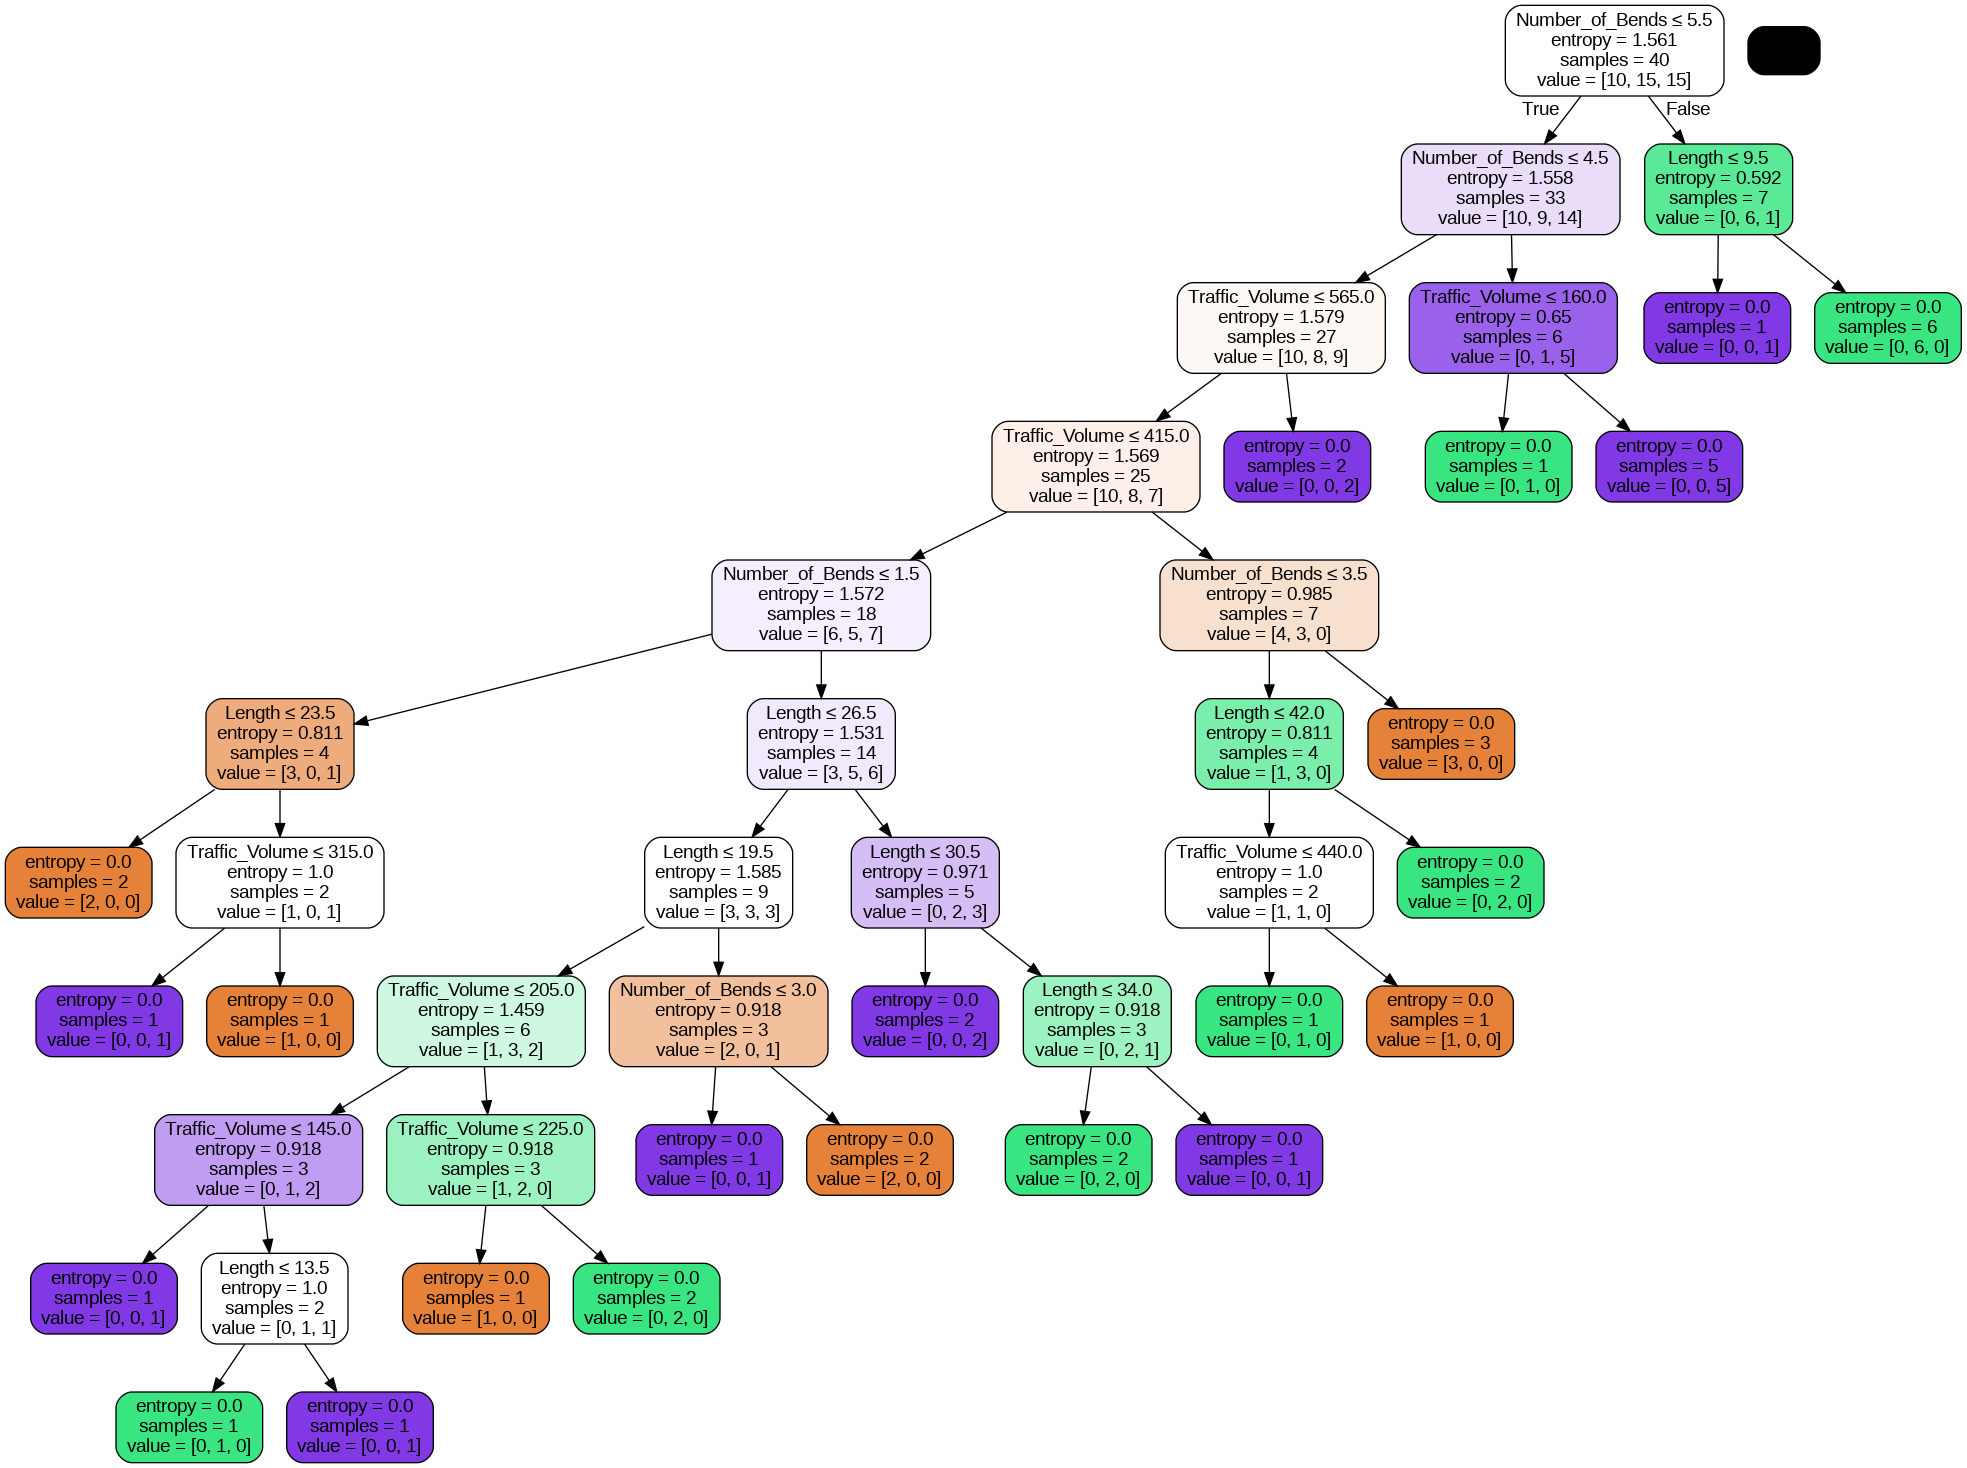

In [ ]:

dot_data =StringIO()
export_graphviz(clf,out_file=dot_data,feature_names= x.columns,
                filled=True,rounded= True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())